In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install sklearn

  Using cached pandas-1.1.5-cp36-cp36m-win_amd64.whl (8.7 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-win_amd64.whl (8.5 MB)
  Using cached Pillow-8.4.0-cp36-cp36m-win_amd64.whl (3.2 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl (51 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)
  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached regex-2023.8.8-cp36-cp36m-win_amd64.whl (280 kB)
  Using cached click-8.0.4-py3-none-any.whl (97 kB)
  Using cached importlib_resources-5.4.0-py3-none-any.whl (28 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Us

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\dell\anaconda3\envs\pr\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\dell\\AppData\\Local\\Temp\\pip-install-swx2wfzj\\sklearn_4cd8fb3764ec4f2bbcd72ce2fa44fb73\\setup.py'"'"'; __file__='"'"'C:\\Users\\dell\\AppData\\Local\\Temp\\pip-install-swx2wfzj\\sklearn_4cd8fb3764ec4f2bbcd72ce2fa44fb73\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\dell\AppData\Local\Temp\pip-pip-egg-info-ce1dba0n'
         cwd: C:\Users\dell\AppData\Local\Temp\pip-install-swx2wfzj\sklearn_4cd8fb3764ec4f2bbcd72ce2fa44fb73\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for

      'sklearn' instead of 'scikit-learn' and report it to their issue tracker
    - as a last resort, set the environment variable
      SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
    
    More information is available at
    https://github.com/scikit-learn/sklearn-pypi-package
    
    If the previous advice does not cover your use case, feel free to report it at
    https://github.com/scikit-learn/sklearn-pypi-package/issues/new
    ----------------------------------------


In [2]:
import os
import pandas as pd

# Path to the directory containing the reviews
data_dir = r"C:\Users\dell\Desktop\nlp\project\txt_sentoken"

# Create an empty DataFrame
df = pd.DataFrame(columns=["review", "label"])

# Iterate through each subfolder (pos and neg)
for category in ["pos", "neg"]:
    category_dir = os.path.join(data_dir, category)
    # Iterate through each file in the subfolder
    for filename in os.listdir(category_dir):
        with open(os.path.join(category_dir, filename), 'r') as file:
            review = file.read()
            # Append the review and label to the DataFrame
            df = df.append({"review": review, "label": "neg" if category == "neg" else "pos"}, ignore_index=True)

# Check the length of the DataFrame
print("Number of reviews:", len(df))
# Display the DataFrame
print(df.head())


Number of reviews: 2000
                                              review label
0  films adapted from comic books have had plenty...   pos
1  every now and then a movie comes along from a ...   pos
2  you've got mail works alot better than it dese...   pos
3   " jaws " is a rare film that grabs your atten...   pos
4  moviemaking is a lot like being the general ma...   pos


In [17]:
def whitespace_tokenization(text):
    return text.split()

# Tokenize the 'review' column
tokens = df['review'].apply(whitespace_tokenization)

print(tokens)
print(tokens[0])

0       [films, adapted, from, comic, books, have, had...
1       [every, now, and, then, a, movie, comes, along...
2       [you've, got, mail, works, alot, better, than,...
3       [", jaws, ", is, a, rare, film, that, grabs, y...
4       [moviemaking, is, a, lot, like, being, the, ge...
                              ...                        
1995    [if, anything, ,, ", stigmata, ", should, be, ...
1996    [john, boorman's, ", zardoz, ", is, a, goofy, ...
1997    [the, kids, in, the, hall, are, an, acquired, ...
1998    [there, was, a, time, when, john, carpenter, w...
1999    [two, party, guys, bob, their, heads, to, hadd...
Name: review, Length: 2000, dtype: object
['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', "they're", 'about', 'superheroes', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',', 'or', 'geared', 'toward', 'kids', '(', 'casper', ')', 'or', 'the', 'arthouse', 'crowd', '(', 'ghost', 'world', ')', ',', 'bu

In [4]:
import re
def clean_tokens(tokens):
    return [token for token in tokens if re.match(r'^[^\W\d_]+\'?[^\W\d_]*$', token)]
# Remove tokens with special characters
tokens = tokens.apply(clean_tokens)

print(tokens[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', 'whether', "they're", 'about', 'superheroes', 'batman', 'superman', 'spawn', 'or', 'geared', 'toward', 'kids', 'casper', 'or', 'the', 'arthouse', 'crowd', 'ghost', 'world', 'but', "there's", 'never', 'really', 'been', 'a', 'comic', 'book', 'like', 'from', 'hell', 'before', 'for', 'starters', 'it', 'was', 'created', 'by', 'alan', 'moore', 'and', 'eddie', 'campbell', 'who', 'brought', 'the', 'medium', 'to', 'a', 'whole', 'new', 'level', 'in', 'the', 'mid', 'with', 'a', 'series', 'called', 'the', 'watchmen', 'to', 'say', 'moore', 'and', 'campbell', 'thoroughly', 'researched', 'the', 'subject', 'of', 'jack', 'the', 'ripper', 'would', 'be', 'like', 'saying', 'michael', 'jackson', 'is', 'starting', 'to', 'look', 'a', 'little', 'odd', 'the', 'book', 'or', 'graphic', 'novel', 'if', 'you', 'will', 'is', 'over', 'pages', 'long', 'and', 'includes', 'nearly', 'more', 'that', 'consist', 'of', 'nothing', 'but', 

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Modify the function to remove stop words
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Remove stop words
tokens = tokens.apply(remove_stopwords)

print(tokens[0])

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', "they're", 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', "there's", 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', "hell's", 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anything', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Download the WordNet resource
nltk.download('omw')
nltk.download('wordnet')

# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS
def lemmatize_with_pos(tokens):
    lemmatized_tokens = []
    for sublist in tokens:
        # Tokenize the sublist to get POS tags
        pos_tags = pos_tag(sublist)
        # Lemmatize each word based on its POS tag
        lemmatized_sublist = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
        lemmatized_tokens.append(lemmatized_sublist)
    return lemmatized_tokens

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'  # Adjective
    elif nltk_tag.startswith('V'):
        return 'v'  # Verb
    elif nltk_tag.startswith('N'):
        return 'n'  # Noun
    elif nltk_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to noun

# Lemmatize each word with its POS
tokens = lemmatize_with_pos(tokens)

print(tokens[0])  # Print output

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['film', 'adapt', 'comic', 'book', 'plenty', 'success', 'whether', "they're", 'superheroes', 'batman', 'superman', 'spawn', 'gear', 'toward', 'kid', 'casper', 'arthouse', 'crowd', 'ghost', 'world', "there's", 'never', 'really', 'comic', 'book', 'like', 'hell', 'starter', 'create', 'alan', 'moore', 'eddie', 'campbell', 'bring', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'call', 'watchman', 'say', 'moore', 'campbell', 'thoroughly', 'research', 'subject', 'jack', 'ripper', 'would', 'like', 'say', 'michael', 'jackson', 'start', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'page', 'long', 'include', 'nearly', 'consist', 'nothing', 'footnote', 'word', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumble', 'block', "hell's", 'director', 'albert', 'allen', 'hughes', 'get', 'hughes', 'brother', 'direct', 'seem', 'almost', 'ludicrous', 'cast', 'carrot', 'top', 'well', 'anything', 'riddle', 'well', 'direct', 'film', "

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens into a list of strings
documents = [' '.join(tokens) for tokens in tokens]

# Concatenate tokens and labels into a single list
#documents.extend(df['label'].tolist())

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
vectors = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()

denselist = dense.tolist()
data_frame = pd.DataFrame(denselist, columns=feature_names)

data_frame.head()

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,...,zucker,zuehlke,zuko,zukovsky,zundel,zurg,zweibel,zwick,zwigoff,zycie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(feature_names)

['aa', 'aaa', 'aaaaaaaaah', 'aaaaaaaahhhh', 'aaaaaah', 'aaaahhhs', 'aahs', 'aaliyah', 'aalyah', 'aamir', 'aardman', 'aaron', 'aatish', 'ab', 'aback', 'abandon', 'abandoned', 'abandonment', 'abate', 'abba', 'abbe', 'abberation', 'abberline', 'abbots', 'abbott', 'abbotts', 'abbreviate', 'abby', 'abc', 'abdomen', 'abduct', 'abductees', 'abduction', 'abe', 'abel', 'aberdeen', 'aberration', 'abet', 'abetted', 'abeyance', 'abhorrence', 'abhorrent', 'abide', 'abider', 'abigail', 'abiility', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably', 'abnormal', 'abnormally', 'abo', 'aboard', 'abode', 'abolish', 'abolitionist', 'abolitionists', 'abominable', 'abomination', 'aborbed', 'aborginal', 'aboriginal', 'aborigine', 'abort', 'aborted', 'abortion', 'abortionist', 'abortive', 'aboslutely', 'abound', 'abounds', 'about', 'abouts', 'abraded', 'abraham', 'abrahams', 'abrams', 'abrasive', 'abreast', 'abril', 'abroad', 'abrupt', 'abruptly', 'abs', 'abscond', 'absence', 'absense', 'absent', 'abs

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_frame,df.label,train_size=0.9)

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 82.5 %
Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.83      0.82        96
         pos       0.84      0.82      0.83       104

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



In [12]:
import pickle

# Save the model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [13]:
# Load the model from the file
with open('svm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded)*100, "%")
print("Loaded Model Classification Report:\n", classification_report(y_test, y_pred_loaded))

Loaded Model Accuracy: 82.5 %
Loaded Model Classification Report:
               precision    recall  f1-score   support

         neg       0.81      0.83      0.82        96
         pos       0.84      0.82      0.83       104

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



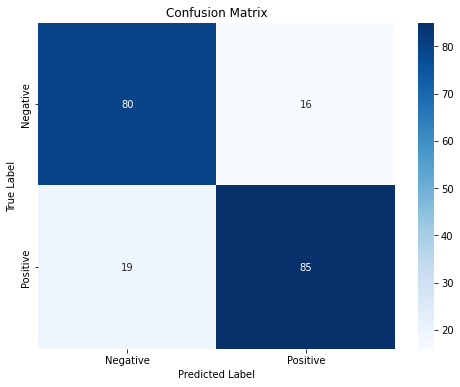

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [15]:
os.getcwd()

'C:\\Users\\dell'

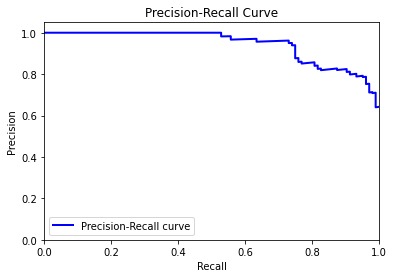

In [16]:
# Assuming clf is your trained SVM classifier
y_scores = clf.decision_function(X_test)

# Convert string labels to binary format
y_test_binary = y_test.replace({'neg': 0, 'pos': 1})

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_scores)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
